# Import Library

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Data

In [2]:
train=pd.read_csv("train_aWnotuB.csv")
test=pd.read_csv("test_BdBKkAj_L87Nc3S.csv")

# Exploratory Data Analysis

In [3]:
train1=train.copy()

In [4]:
train1.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [9]:
train1.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

In [10]:
train1.shape

(48120, 4)

In [11]:
train1.isna().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000268A57A60B8>,
      dtype=object)

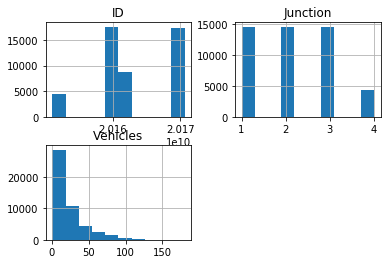

In [5]:
train1.hist()

In [6]:
train1.corr()

,Junction,Vehicles,ID
Junction,1.000000,-0.613787,0.221876
Vehicles,-0.613787,1.000000,0.227974
ID,0.221876,0.227974,1.000000


(3.5, -0.5)

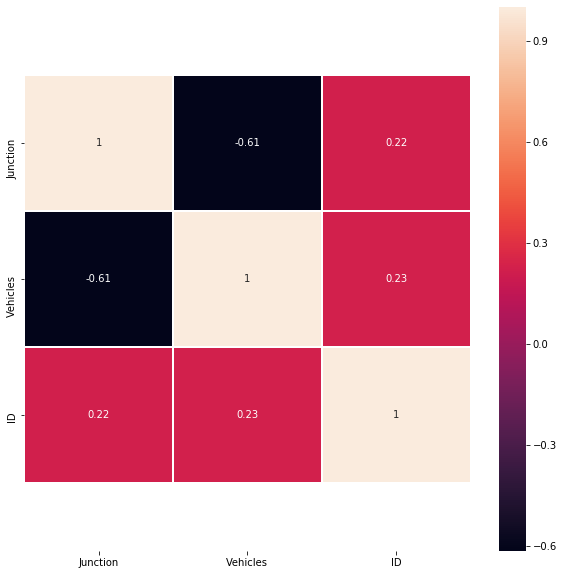

In [7]:

fig, ax = plt.subplots(figsize=(10,10))
ht=sns.heatmap(train.corr(),annot=True,linewidths=0.5,ax=ax)
bottom,top=ht.get_ylim()
ht.set_ylim(bottom+0.5,top-0.5)


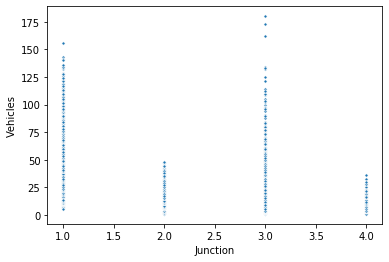

In [8]:
sns.scatterplot(x="Junction",y="Vehicles",data=train,sizes=(100,100),palette="gist_rainbow",s=10)

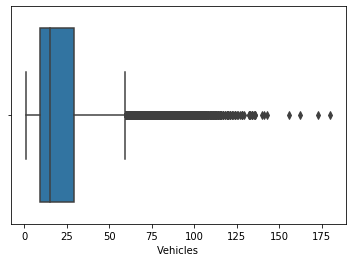

In [12]:
sns.boxplot(x=train1['Vehicles'])

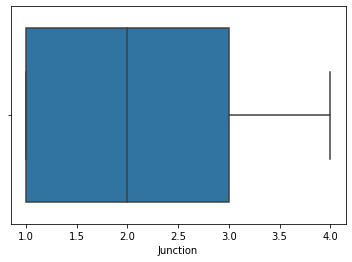

In [14]:
sns.boxplot(x=train1['Junction'])

# Data Preprocessing

In [15]:
train1['DateTime']=train1['DateTime'].astype('datetime64[ns]')

In [16]:
train1['Day']=train1['DateTime'].dt.day
train1['Month']=train1['DateTime'].dt.month
train1['Year']=train1['DateTime'].dt.year
train1['Time_in_Hours']=train1['DateTime'].dt.hour

In [17]:
train1.head()

,DateTime,Junction,Vehicles,ID,Day,Month,Year,Time_in_Hours
0,2015-11-01 00:00:00,1,15,20151101001,1,11,2015,0
1,2015-11-01 01:00:00,1,13,20151101011,1,11,2015,1
2,2015-11-01 02:00:00,1,10,20151101021,1,11,2015,2
3,2015-11-01 03:00:00,1,7,20151101031,1,11,2015,3
4,2015-11-01 04:00:00,1,9,20151101041,1,11,2015,4


In [18]:
train1.drop(['DateTime'],axis=1,inplace=True)

In [19]:
train1.head()

,Junction,Vehicles,ID,Day,Month,Year,Time_in_Hours
0,1,15,20151101001,1,11,2015,0
1,1,13,20151101011,1,11,2015,1
2,1,10,20151101021,1,11,2015,2
3,1,7,20151101031,1,11,2015,3
4,1,9,20151101041,1,11,2015,4


In [20]:
train1.drop(['ID'],axis=1,inplace=True)

# Train Test Split

In [22]:
X=pd.DataFrame()
X=train1
y=train1['Vehicles']
X.drop(['Vehicles'],axis=1,inplace=True)
X=pd.get_dummies(X)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [34]:
X_train.shape

(38496, 5)

In [33]:
y.shape

(48120,)

In [35]:
std=StandardScaler()
X_train_scaled=pd.DataFrame(std.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test_scaled=pd.DataFrame(std.transform(X_test),columns=X_test.columns,index=X_test.index)

# Linear Regression

In [36]:
lr=LinearRegression()

In [37]:
RMSE1=cross_val_score(lr,X_train_scaled,y_train,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')

In [38]:
lr.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_train_pred=lr.predict(X_train_scaled)
y_val_pred=lr.predict(X_test_scaled)
y_pred_lr=np.append(y_train_pred,y_val_pred)

In [43]:
print('Train RMSE:',(sqrt(mean_squared_error(y_train,y_train_pred))))
print('Test RMSE:',(sqrt(mean_squared_error(y_test,y_val_pred))))


Train RMSE: 13.381631428425484
Test RMSE: 13.273062803665152


# Learning Curve with Linear Regression

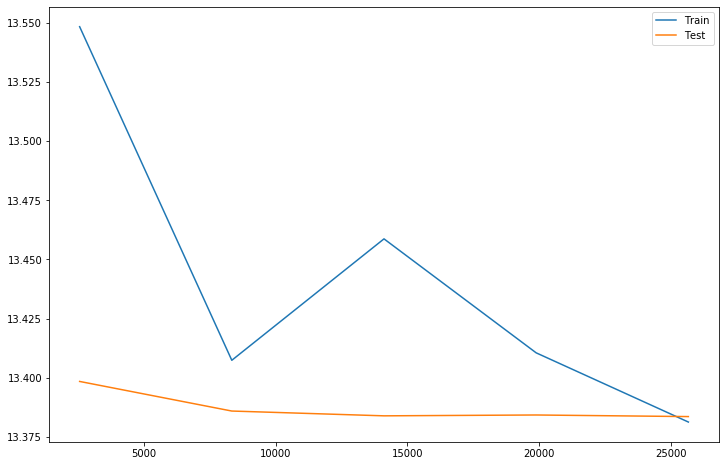

In [49]:
lc=learning_curve(lr,X_train_scaled,y_train,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')
size=lc[0]
train_score=[-lc[1][i].mean() for i in range (0,5)]
test_score=[-lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,np.sqrt(train_score),label='Train')
plt.plot(size,np.sqrt(test_score),label="Test")
plt.legend()

# XGBoost

In [45]:

xgb=XGBRegressor(random_state=50)
xgb.fit(X_train_scaled,y_train)
y_train_pred2=xgb.predict(X_train_scaled)
y_val_pred2=xgb.predict(X_test_scaled)


In [46]:
print('Train RMSE:',(sqrt(mean_squared_error(y_train,y_train_pred2))))
print('Test RMSE:',(sqrt(mean_squared_error(y_test,y_val_pred2))))

Train RMSE: 5.33700059269731
Test RMSE: 5.67357813411297


# Learning Curve with XGBoost

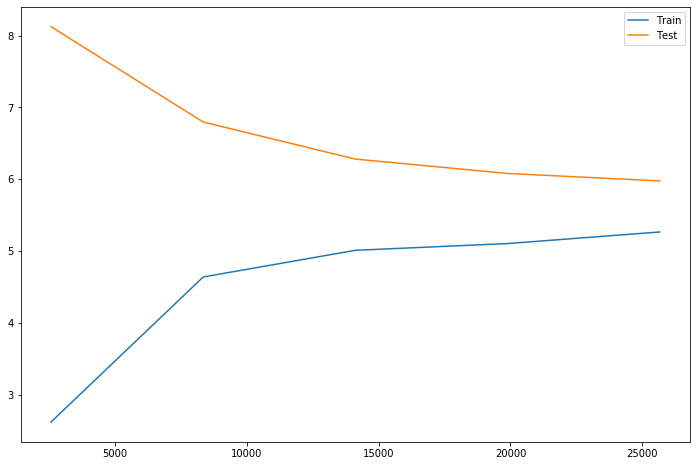

In [48]:

lc=learning_curve(xgb,X_train_scaled,y_train,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')
size=lc[0]
train_score=[-lc[1][i].mean() for i in range (0,5)]
test_score=[-lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,np.sqrt(train_score),label='Train')
plt.plot(size,np.sqrt(test_score),label="Test")
plt.legend()

# Bagging 

In [62]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc.fit(X_train, y_train)
preds = bbc.predict(X_train)

In [64]:
y_train_bbc=bbc.predict(X_train_scaled)
y_val_bbc=bbc.predict(X_test_scaled)

In [65]:
print('Train RMSE:',(sqrt(mean_squared_error(y_train,y_train_bbc))))
print('Test RMSE:',(sqrt(mean_squared_error(y_test,y_val_bbc))))

Train RMSE: 23.786807021525647
Test RMSE: 23.77041276165641


# Learning Curve

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


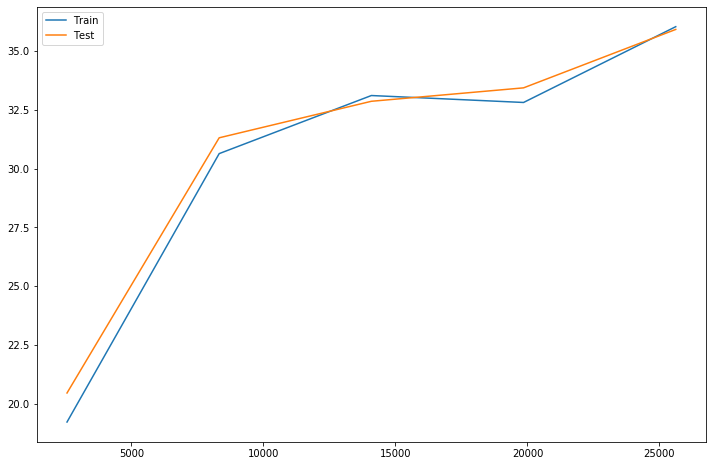

In [66]:
lc=learning_curve(bbc,X_train_scaled,y_train,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')
size=lc[0]
train_score=[-lc[1][i].mean() for i in range (0,5)]
test_score=[-lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,np.sqrt(train_score),label='Train')
plt.plot(size,np.sqrt(test_score),label="Test")
plt.legend()

# KNN

In [51]:
KNN_model=KNeighborsClassifier(n_neighbors=5)

In [52]:
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
y_train_knn=KNN_model.predict(X_train_scaled)
y_val_knn=KNN_model.predict(X_test_scaled)

In [ ]:
y_val_knn=KNN_model.predict(X_val_scaled1)

In [54]:
print('Train RMSE:',(sqrt(mean_squared_error(y_train,y_train_knn))))
print('Test RMSE:',(sqrt(mean_squared_error(y_test,y_val_knn))))

Train RMSE: 8.045984642633424
Test RMSE: 8.853440938914817


# Learning Curve with KNN

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


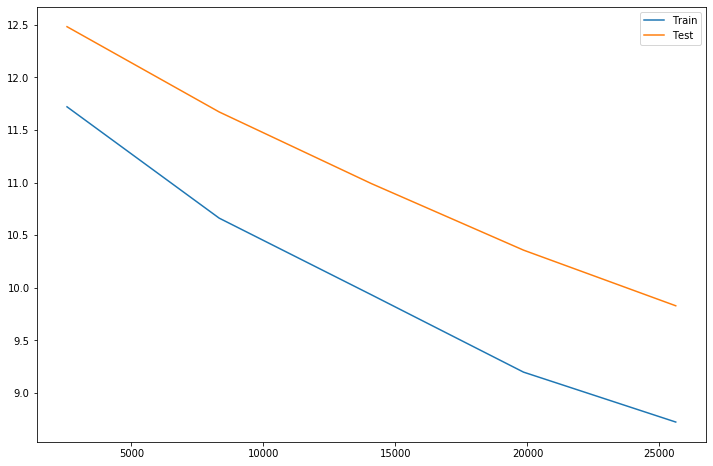

In [57]:
lc=learning_curve(KNN_model,X_train_scaled,y_train,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')
size=lc[0]
train_score=[-lc[1][i].mean() for i in range (0,5)]
test_score=[-lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,np.sqrt(train_score),label='Train')
plt.plot(size,np.sqrt(test_score),label="Test")
plt.legend()

# Results on Test Data

In [67]:
test.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [68]:
ID=test.ID

In [69]:
test.isna().sum()

DateTime    0
Junction    0
ID          0
dtype: int64

In [70]:
test['DateTime']=test['DateTime'].astype('datetime64[ns]')
test['Day']=test['DateTime'].dt.day
test['Month']=test['DateTime'].dt.month
test['Year']=test['DateTime'].dt.year
test['Time_in_Hours']=test['DateTime'].dt.hour

In [71]:
test.drop(['ID','DateTime'],axis=1,inplace=True)

In [72]:
test=pd.get_dummies(test)

In [73]:
test_scaled=pd.DataFrame(std.transform(test),columns=test.columns)
test_scaled.head()

,Junction,Day,Month,Year,Time_in_Hours
0,-1.224524,-1.676325,0.31072,1.186096,-1.662511
1,-1.224524,-1.676325,0.31072,1.186096,-1.517999
2,-1.224524,-1.676325,0.31072,1.186096,-1.373487
3,-1.224524,-1.676325,0.31072,1.186096,-1.228975
4,-1.224524,-1.676325,0.31072,1.186096,-1.084463


In [74]:
pred=bbc.predict(test_scaled)

In [76]:
submission1=pd.DataFrame(index=ID)
submission1["Vehicles"]=list(map(int,pred))
submission1.to_csv("Submission1.csv")

In [78]:
pred2=lr.predict(test_scaled)

In [79]:
submission2=pd.DataFrame(index=ID)
submission2["Vehicles"]=list(map(int,pred))
submission2.to_csv("Submission2.csv")